# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
starter_lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
starter_lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(starter_lats, starter_lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

46

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Retrieving data from API call

# Creating empty lists for future information we want from API call

lats = []
lngs = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []


# Creating a city count that starts at 1, but will increase as the following loop iterates through
city_number = 1

cities_to_drop = []

# Constructing the URL in a for-loop
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + weather_api_key + "&q=" + city

    # Sending the API query
    response = requests.get(query_url).json()

    # appending relevant information form each call to its respective list
    try:
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        temperature.append((9/5) * (response['main']['temp_max'] - 273) + 32) # Appends and converts from Kelvin to Fahrenheit
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
            
        print(f'City {city_number}: {city}')
        city_number += 1
    except:
        print('City not found')
        cities_to_drop.append(city)
        pass

print(len(cities_to_drop))

City not found
City 1: pitlochry
City 2: ancud
City 3: mataura
City 4: hobart
City 5: port hedland
City 6: albany
City 7: san ramon
City 8: palora
City 9: castro
City 10: vaini
City not found
City 11: newcastle
City 12: punta arenas
City 13: rikitea
City 14: cape town
City 15: busselton
City 16: nikolskoye
City 17: zhigalovo
City 18: hithadhoo
City 19: ushuaia
City 20: upernavik
City 21: mlonggo
City 22: vilhena
City 23: yellowknife
City 24: aswan
City 25: lebu
City 26: ribeira grande
City 27: clyde river
City 28: along
City 29: fuerte olimpo
City 30: puerto ayora
City 31: darnah
City 32: bredasdorp
City 33: thompson
City 34: nhulunbuy
City 35: namibe
City 36: hambantota
City 37: havoysund
City 38: mar del plata
City 39: hermanus
City 40: saint george
City 41: chipinge
City 42: ulaangom
City 43: jadu
City 44: tasiilaq
2


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
# Printout to confirm the number of values in each list
print("Total Cities: " + str(len(cities)))
print("Cities without information: " + str(len(cities_to_drop)))
print(
    f'Latitude Values: {len(lats)}\n'
    f'Longitude Values: {len(lngs)}\n'
    f'Temperature Values: {len(temperature)}\n'
    f'Humidity Values: {len(humidity)}\n'
    f'Cloudiness Values: {len(cloudiness)}\n'
    f'Wind Speed Values: {len(wind_speed)}\n'
)

# Dropping cities without values from the data set
for city in cities_to_drop:
    cities.remove(city)

print(str(len(cities_to_drop)) + " incomplete cities dropped:")
print(str(len(cities)) + " Cities remaining in data set")

Total Cities: 44
Cities without information: 2
Latitude Values: 44
Longitude Values: 44
Temperature Values: 44
Humidity Values: 44
Cloudiness Values: 44
Wind Speed Values: 44



ValueError: list.remove(x): x not in list

In [56]:
# Passing lists into a dictionary
weather_dict = {
    "City" : cities,
    "Lat" : lats,
    "Lng" : lngs,
    "Max Temp (f)" : temperature,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed
}
# Creating a unified data frame
weather_df = pd.DataFrame(weather_dict)

# Exporting weather data frame to .csv file
weather_df.to_csv('../output_data/weather.csv')

weather_df.head()


,City,Lat,Lng,Max Temp (f),Humidity,Cloudiness,Wind Speed
0,pitlochry,56.7051,-3.7343,41.270,87,40,0.45
1,ancud,-41.8697,-73.8203,55.274,94,90,1.03
2,mataura,-46.1927,168.8643,56.264,86,100,6.71
3,hobart,-42.8794,147.3294,64.274,63,75,4.12
4,port hedland,-20.3167,118.5667,88.070,15,0,7.20


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
# Code to remove any cities if their humidity is over 100% 

weather_df = weather_df.loc[weather_df['Humidity'] <= 100]
weather_df.head()

,City,Lat,Lng,Max Temp (f),Humidity,Cloudiness,Wind Speed
0,pitlochry,56.7051,-3.7343,41.270,87,40,0.45
1,ancud,-41.8697,-73.8203,55.274,94,90,1.03
2,mataura,-46.1927,168.8643,56.264,86,100,6.71
3,hobart,-42.8794,147.3294,64.274,63,75,4.12
4,port hedland,-20.3167,118.5667,88.070,15,0,7.20
5,albany,42.6001,-73.9662,57.272,46,88,0.22
6,san ramon,37.7799,-121.9780,70.070,30,1,6.17
7,palora,-1.7000,-77.9333,65.210,99,100,0.08
8,castro,-24.7911,-50.0119,53.276,87,0,1.38
9,vaini,-21.2000,-175.2000,75.470,83,75,5.66


In [32]:
#  Get the indices of cities that have humidity over 100%.


In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Latitude vs. Temperature Plot

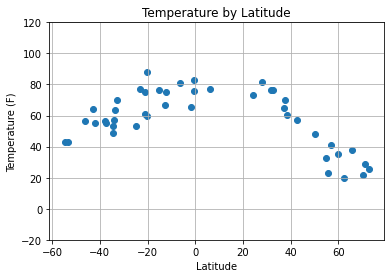

In [34]:
plt.scatter(lats, temperature)
plt.title('Temperature by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-20, 120)
plt.grid()

## Latitude vs. Humidity Plot

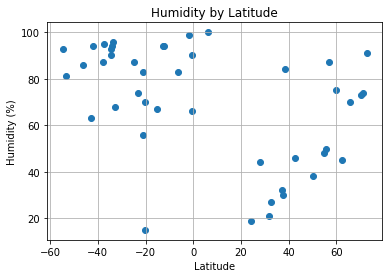

In [35]:
plt.scatter(lats, humidity)
plt.title('Humidity by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid()

## Latitude vs. Cloudiness Plot

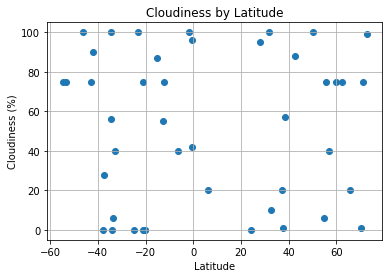

In [36]:
plt.scatter(lats, cloudiness)
plt.title('Cloudiness by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid()


## Latitude vs. Wind Speed Plot

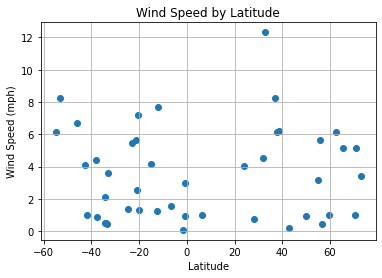

In [37]:
plt.scatter(lats, wind_speed)
plt.title('Wind Speed by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.grid()

## Linear Regression

In [38]:
# Creating new data frames for northern and southern hemispheres

# North data frame
north_df = weather_df.loc[weather_df['Lat'] > 0]

# Assigning quick variables for later convenience
n_lats = north_df['Lat']
n_temperature = north_df['Max Temp (f)']
n_humidity = north_df['Humidity']
n_cloudiness = north_df['Cloudiness']
n_wind_speed = north_df['Wind Speed']


# South data frame
south_df = weather_df.loc[weather_df['Lat'] < 0]

# Assigning quick variables for later convenience
s_lats = south_df['Lat']
s_temperature = south_df['Max Temp (f)']
s_humidity = south_df['Humidity']
s_cloudiness = south_df['Cloudiness']
s_wind_speed = south_df['Wind Speed']


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

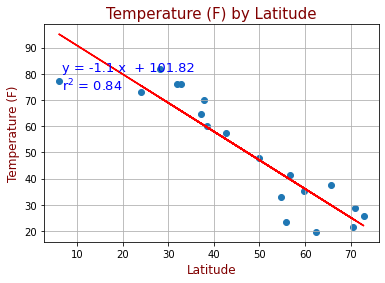

In [39]:
plt.scatter(n_lats, n_temperature)
plt.title('Northern: Temperature (F) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Temperature (F)', color='maroon', size=12)
plt.grid()


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_temperature)
regress_model_values = n_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (n_lats.min() * 1.1), (n_temperature.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(n_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='blue', size=13)


plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

-49.32 79.26299999999998


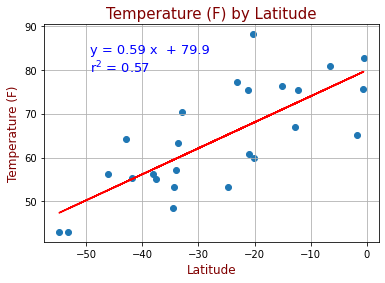

In [49]:
plt.scatter(s_lats, s_temperature)
plt.title('Southern: Temperature (F) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Temperature (F)', color='maroon', size=12)
plt.grid()


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_temperature)
regress_model_values = s_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (s_lats.min() * 0.9), (s_temperature.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(s_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='blue', size=13)


plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

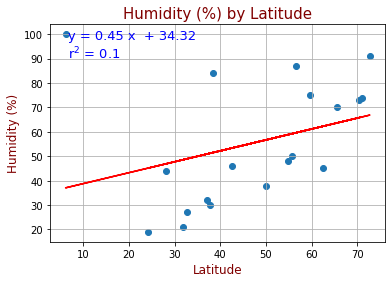

In [41]:
plt.scatter(n_lats, n_humidity)
plt.title('Northern: Humidity (%) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Humidity (%)', color='maroon', size=12)
plt.grid()


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_humidity)
regress_model_values = n_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (n_lats.min() * 1.1), (n_humidity.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(n_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='blue', size=13)


plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

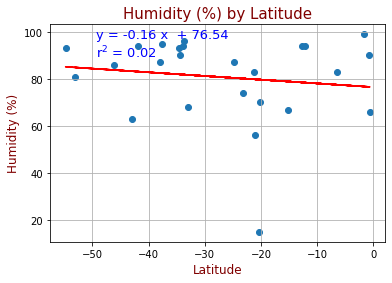

In [50]:
plt.scatter(s_lats, s_humidity)
plt.title('Southern: Humidity (%) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Humidity (%)', color='maroon', size=12)
plt.grid()


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_humidity)
regress_model_values = s_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (s_lats.min() * 0.9), (s_humidity.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(s_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='blue', size=13)


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

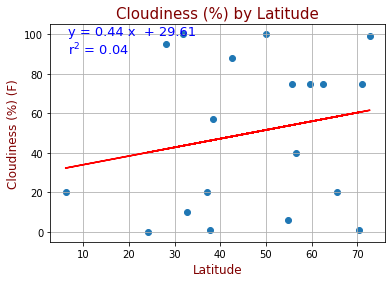

In [43]:
plt.scatter(n_lats, n_cloudiness)
plt.title('Northern: Cloudiness (%) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Cloudiness (%)', color='maroon', size=12)
plt.grid()


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_cloudiness)
regress_model_values = n_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (n_lats.min() * 1.1), (n_cloudiness.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(n_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='blue', size=13)


plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

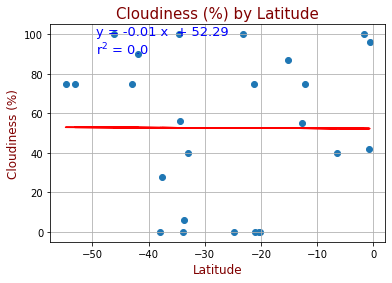

In [51]:
plt.scatter(s_lats, s_cloudiness)
plt.title('Southern: Cloudiness (%) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Cloudiness (%)', color='maroon', size=12)
plt.grid()


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_cloudiness)
regress_model_values = s_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (s_lats.min() * 0.9), (s_cloudiness.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(s_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='blue', size=13)


plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

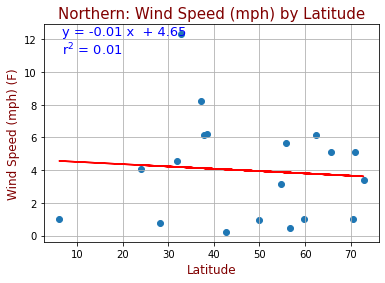

In [53]:
plt.scatter(n_lats, n_wind_speed)
plt.title('Northern: Wind Speed (mph) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Wind Speed (mph)', color='maroon', size=12)
plt.grid()


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_wind_speed)
regress_model_values = n_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (n_lats.min() * 1.1), (n_wind_speed.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(n_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='blue', size=13)


plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

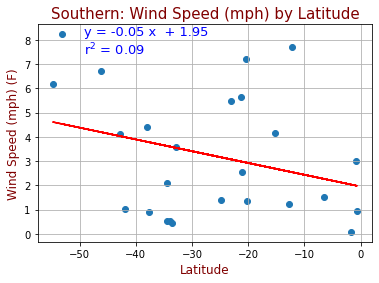

In [54]:
plt.scatter(s_lats, s_wind_speed)
plt.title('Southern: Wind Speed (mph) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Wind Speed (mph)', color='maroon', size=12)
plt.grid()


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_wind_speed)
regress_model_values = s_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location

x, y = (s_lats.min() * 0.9), (s_wind_speed.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(s_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='blue', size=13)


plt.show()